# Adding a new technology

## Input Files

MUSE is made up of a number of different [input files](../inputs/index.rst). These, however, can be broadly split into two:

- [Simulation settings](../inputs/toml.rst)

- [Simulation data](../inputs/inputs_csv.rst)

Simulation settings specify how a simulation should be run. For example, which sectors to run, for how many years and what to output.

Whereas, simulation data parametrises the technologies involved in the simulation, or the number and kinds of agents.

To create a customised case study it is necessary to edit both of these file types.

Simulation settings are specified in a TOML file. [TOML](https://github.com/toml-lang/toml) is a simple, extensible and intuitive file format well suited  for specifying small sets of complex data.

Simulation data is specified in [CSV](https://en.wikipedia.org/wiki/Comma-separated_values). This is a common format used for larger datasets, and is made up of columns and rows, with a comma used to differentiate between entries. 

MUSE requires at least the following files to successfully run:

* a single [simulation settings TOML file](../inputs/toml.rst) for the simulation as a whole
* a file indicating initial market price [projections](../inputs/projections.rst)
* a file describing the [commodities in the simulation](../inputs/commodities.rst)
* for generalized sectors:
   * a file descring the [agents](../inputs/agents.rst)
   * a file descring the [technologies](../inputs/technodata.rst)
   * a file descring the [input commodities](../inputs/commodities_io.rst) for each technology
   * a file descring the [output commodities](../inputs/commodities_io.rst) for each technology
   * a file descring the [existing capacity](../inputs/existing_capacity.rst) of a given
     sector
* for each preset sector:
   * a csv file describing consumption for the duration of the simulation
   
For a full description of these files see the [input files section](../inputs/index.rst). To see how to customise an example, continue on this page.

## Addition of solar PV

In this section, we will add solar photovoltaics to the default model seen in the [example page](../running-muse-example.ipynb). To achieve this, we must modify some of the input files shown in the above section. These files can be found in the ```StarMuse``` folder at the following location:

`{muse_install_location}/src/muse/data/example/default`

Change ```{muse_install_location}``` to the location where you installed MUSE using your file browser. You can modify the files in your favourite spreadsheet editor or text editor such as VSCODE, Excel, Numbers, Notepad or TextEdit.

### Technodata Input 

Within the default folder there is the ```settings.toml``` file, input folder and technodata folder. To add a technology within the power sector, we must open the ```technodata``` folder followed by the ```power``` folder.

At this point, we must note that we require consistency in input and output units. For example, if capacity is in PJ, the same basis would be needed for the output files `CommIn.csv` and `CommOut.csv`. In addition, across sectors a commodity needs to maintain the same unit. In these examples, we use the unit petajoules (PJ).

Next, we will edit the ```CommIn.csv``` file, which specifies the commodities consumed by solar photovoltaics.

The table below shows the original ```CommIn.csv``` version in normal text, and the added column and row in **bold**.

|ProcessName|RegionName|Time|Level|electricity|gas|heat|CO2f|wind|**solar**|
|-----------|----------|----|-----|-----------|---|----|----|----|----|
|Unit|-|Year|-|PJ/PJ|PJ/PJ|PJ/PJ|kt/PJ|PJ/PJ|**PJ/PJ**|
|gasCCGT|R1|2020|fixed|0|1.67|0|0|0|**0**|
|windturbine|R1|2020|fixed|0|0|0|0|1|**0**|
|**solarPV**|**R1**|**2020**|**fixed**|**0**|**0**|**0**|**0**|**0**|**1**|

We must first add a new row at the bottom of the file, to indicate the new solar photovoltaic technology:

- we call this technology ```solarPV``` 
- place it in region ```R1``` 
- the data in this row is associated to the year 2020
- the input type is fixed
- solarPV consumes solar

As the solar commodity has not been previously defined, we must define it by adding a column, which we will call solar. We fill out the entries in the solar column, ie. that neither `gasCCGT` nor `windturbine` consume solar.


We repeat this process for the file: ```CommOut.csv```. This file specifies the output of the technology. In our case, solar photovoltaics only output ```electricity```. This is unlike ```gasCCGT``` which also outputs ```CO2f```, or carbon dioxide.

|ProcessName|RegionName|Time|Level|electricity|gas|heat|CO2f|wind|**solar**|
|-|-|-|-|-|-|-|-|-|----|
|Unit|-|Year|-|PJ/PJ|PJ/PJ|PJ/PJ|kt/PJ|PJ/PJ|**PJ/PJ**|
|gasCCGT|R1|2020|fixed|1|0|0|91.67|0|**0**|
|windturbine|R1|2020|fixed|1|0|0|0|0|**0**|
|**solarPV**|**R1**|**2020**|**fixed**|**1**|**0**|**0**|**0**|**0**|**0**|

Similar to the the ```CommIn.csv```, we create a new row, and add in the solar commodity. We must ensure that we call our new commodity and technologies the same as the previous file for MUSE to successfully run. ie `solar` and `solarPV`.

Please not that we use flat forward extension of the values when only one value is defined. For example, in the `CommOut.csv` we only provide data for the year 2020. Therefore for the years, 2025, 2030, 2035... we assume the data remains unchanged from 2020.

The next file to modify is the ```ExistingCapacity.csv``` file. This file details the existing capacity of each technology, per year. For this example, we will set the existing capacity to be 0. Please note, that the model interpolates between years linearly. 

|ProcessName|RegionName|Unit|2020|2025|2030|2035|2040|2045|2050|
|-|-|-|-|-|-|-|-|-|-|
|gasCCGT|R1|PJ/y|1|1|0|0|0|0|0|
|windturbine|R1|PJ/y|0|0|0|0|0|0|0|
|**solarPV**|**R1**|**PJ/y**|**0**|**0**|**0**|**0**|**0**|**0**|**0**|


Finally, the ```technodata.csv``` containts parametrisation data for the technology, such as the cost, growth constraints, lifetime of the power plant and fuel used. The technodata file is too long for it all to be displayed here, so we will truncate the full version.

Here, we will only define the parameters: ```processName```, ```RegionName```, ```Time```, ```Level```,```cap_par```, ```Fuel```,```EndUse```,```Agent2``` and ```Agent1```

We shall copy the existing parameters from the ```windturbine``` technology for the remaining parameters that can be seen in the ```technodata.csv``` file for brevity. You can see the full file [here INSERT LINK HERE](here).

Again, flat forward extension is used here. Therefore, as in this example we only provide data for the year 2020, 2025 and the following years will keep the same characteristics, e.g. costs, for each year of the simulation.

|ProcessName|RegionName|Time|Level|cap_par|cap_exp|…|Fuel|EndUse|Agent2|Agent1|
|-|-|-|-|-|-|-|-|-|-|-|
|Unit|-|Year|-|MUS$2010/PJ_a|-|…|-|-|Retrofit|New|
|gasCCGT|R1|2020|fixed|23.78234399|1|…|gas|electricity|1|0|
|windturbine|R1|2020|fixed|36.30771182|1|…|wind|electricity|1|0|
|**solarPV**|**R1**|**2020**|**fixed**|**30**|**1**|...|**solar**|**electricity**|**1**|**0**|

### Global inputs

Next, navigate to the ```input``` folder, found at ```{muse_installation_location}src/muse/data/example/default/input```.

We must now edit each of the files found here to add the new solar commodity. Due to space constraints we will not display all of the entries contained in the input files. The edited files can be viewed [here INSERT LINK HERE](here) however.

The ```BaseYearExport.csv``` file defines the exports in the base year. For our example we add a column to indicate that there is no export for solar. However, it is important that a column exists for our new commodity.

It is noted, however, that the `BaseYearImport.csv` as well as the `BaseYearExport.csv` files are optional files to define exogenous imports and exports; all values are set to zero if they are not used.

|RegionName|Attribute|Time|electricity|gas|heat|CO2f|wind|**solar**|
|-|-|-|-|-|-|-|-|-|
|Unit|-|Year|PJ|PJ|PJ|kt|PJ|**PJ**|
|R1|Exports|2010|0|0|0|0|0|**0**|
|R1|Exports|2015|0|0|0|0|0|**0**|
|...|...|...|...|...|...|...|...|**...**|
|R1|Exports|2100|0|0|0|0|0|**0**|

The ```BaseYearImport.csv``` file defines the imports in the base year. Similarly to ```BaseYearExport.csv```, we add a column for solar in the ```BaseYearImport.csv``` file. Again, we indicate that solar has no imports.

|RegionName|Attribute|Time|electricity|gas|heat|CO2f|wind|**solar**|
|-|-|-|-|-|-|-|-|-|
|Unit|-|Year|PJ|PJ|PJ|kt|PJ|**PJ**|
|R1|Imports|2010|0|0|0|0|0|**0**|
|R1|Imports|2015|0|0|0|0|0|**0**|
|...|...|...|...|...|...|...|...|**...**|
|R1|Imports|2100|0|0|0|0|0|**0**|

The ```GlobalCommodities.csv``` file is the file which defines the commodities. Here we give the commodities a commodity type, CO2 emissions factor and heat rate. For this file, we will add the solar commodity, with zero CO2 emissions factor and a heat rate of 1.

|Commodity|CommodityType|CommodityName|CommodityEmissionFactor_CO2|HeatRate|Unit|
|-|-|-|-|-|-|
|Electricity|Energy|electricity|0|1|PJ|
|Gas|Energy|gas|56.1|1|PJ|
|Heat|Energy|heat|0|1|PJ|
|Wind|Energy|wind|0|1|PJ|
|CO2fuelcomsbustion|Environmental|CO2f|0|1|kt|
|**Solar**|**Energy**|**solar**|**0**|**1**|**PJ**|

The ```projections.csv``` file details the initial market prices for the commodities. The market clearing algorithm will update these throughout the simulation, however, an initial estimate is required to start the simulation. As solar energy is free, we will indicate this by adding a final column.

|RegionName|Attribute|Time|electricity|gas|heat|CO2f|wind|**solar**|
|-|-|-|-|-|-|-|-|-|
|Unit|-|Year|MUS\$2010/PJ|MUS\$2010/PJ|MUS\$2010/PJ|MUS\$2010/kt|MUS\$2010/kt|**MUS\$2010/kt**|
|R1|CommodityPrice|2010|14.81481472|6.6759|100|0|0|**0**|
|R1|CommodityPrice|2015|17.89814806|6.914325|100|0.052913851|0|**0**|
|...|...|...|...|...|...|...|...|**...**|
|R1|CommodityPrice|2100|21.39814806|7.373485819|100|1.871299697|0|**0**|

### Running our customised simulation

Now we are able to run our simulation, with the new solar power technology.

To do this we run the same run command as previously in the anaconda command prompt:

`python -m muse settings.toml`

The output should be similar to the output [here](../example-output.ipynb). However, expect the simulation to take slightly longer to run. This is due to the additional calculations made.

If the simulation has run successfully, you should now have a folder in the same location as your settings.toml file called Results. The next step is to visualise the results using the python visualisation package ```seaborn``` as well as the data analysis library ```pandas```.

In [1]:
import seaborn as sns

Next, we will import the ```MCACapacity.csv``` file into pandas and print the first 5 lines using the ```head()``` command.

Make sure to change the file path of `"../Results/MCACapacity.csv"` to where the `MCACapacity.csv` is on your computer, otherwise you will receive an error when you import the csv file.

In [6]:
mca_capacity = pd.read_csv("../Results/MCACapacity.csv")
mca_capacity.head()

,technology,region,agent,type,sector,capacity,year
0,gasboiler,R1,A1,retrofit,residential,10.0,2020
1,gasCCGT,R1,A1,retrofit,power,1.0,2020
2,gassupply1,R1,A1,retrofit,gas,15.0,2020
3,gasboiler,R1,A1,retrofit,residential,5.0,2025
4,heatpump,R1,A1,retrofit,residential,19.0,2025


We will only visualise the power sector in this example, as this was the only sector we changed. We, therefore, filter for this sector, and then visualise it using ```seaborn```:

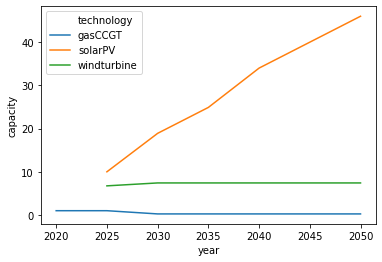

In [7]:
power_capacity = mca_capacity[mca_capacity.sector=="power"]
sns.lineplot(data=power_capacity, x='year', y='capacity', hue="technology")

We can now see that there is solarPV in addition to windturbine and gasCCGT, when compared to the example [here](../running-muse-example.ipynb)! That's great and means it worked! 

The difference in uptake of `solarPV` compared to `windturbine` is due to the fact that ```solarPV``` has a lower ```cap_par``` cost of 30, compared to the ```windturbine```. Meaning that ```solarPV``` outcompetes both ```windturbine``` and ```gasCCGT``` in the electricity market.

### Change Solar Price

Now, we will observe what happens if we increase the price of solar to be more expensive than wind. To achieve, this we have to modify the ```Technodata.csv``` file:

|ProcessName|RegionName|Time|Level|cap_par|cap_exp|…|Fuel|EndUse|Agent2|Agent1|
|-|-|-|-|-|-|-|-|-|-|-|
|Unit|-|Year|-|MUS$2010/PJ_a|-|…|-|-|Retrofit|New|
|gasCCGT|R1|2020|fixed|23.78234399|1|…|gas|electricity|1|0|
|windturbine|R1|2020|fixed|36.30771182|1|…|wind|electricity|1|0|
|solarPV|R1|2020|fixed|**40**|1|...|solar|electricity|1|0|

Here, we increase the ```cap_par``` variable by 10, to be a total of 40. We will now rerun the simulation, using the same command as previously and visualise the new results.

We must import the new ```MCACapacity.csv``` file again, and then visualise the results.

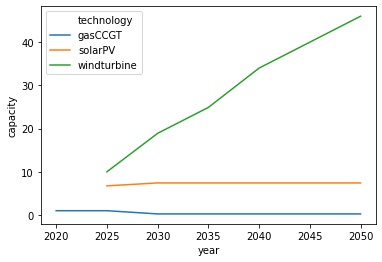

In [8]:
mca_capacity = pd.read_csv("../Results/MCACapacity.csv")
power_capacity = mca_capacity[mca_capacity.sector=="power"]
sns.lineplot(data=power_capacity, x='year', y='capacity', hue="technology")

Now, we can see that the technology ```windturbine``` outcompetes ```solarPV``` and ```gasCCGT``` due to the difference in price. The possibilities for creating your own scenarios are infinite. 

For the full example with the completed input files see [here INSERT LINK HERE](dead-link)

## Next steps

In the next section we will add a new agent to the simulation.